# Rating's Impact on Gross Earnings for Disney Movies

This project explores how a Disney movie's rating impacts its profitability.

The dataset provides information about 579 movies which were produced by the Disney company between 1937 and 2016. It gives the 
<b>title</b> of the movie, its <b>release date</b>, <b>genre</b> and <b>rating</b>. It also includes the <b>total gross</b> made by the movie and the <b>inflation adjusted gross</b>. 

The end goal of this project is to make a recommendation to the Disney company on which rating helps the company earn more money that is if there is any correlation.


## Reading and Exploring the Data

The data is read from the file titled 'disney_movies_total_gross.csv'. 

In [1]:
#Load the necessary libraries and read the data from the file titled 'disney_movies_total_gross.csv'.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

gross = pd.read_csv('disney_movies_total_gross.csv', parse_dates=['release_date'])
gross.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574


Since the movies' release dates encompass such a large span of time, the <b>inflation adjusted gross</b> column will be used to make comparisons among the movies. It will be referred to as <b>gross</b>, and the <b>total gross</b> column will be removed from the dataset to avoid any confusion.


In [2]:
#Remove 'total_gross' then rename 'inflation_adjusted_gross' as just 'gross'
gross.drop(['total_gross'], axis=1, inplace=True)
gross.rename(columns={'inflation_adjusted_gross':'gross'}, inplace=True)
gross.head()

,movie_title,release_date,genre,mpaa_rating,gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,5228953251
1,Pinocchio,1940-02-09,Adventure,G,2188229052
2,Fantasia,1940-11-13,Musical,G,2187090808
3,Song of the South,1946-11-12,Adventure,G,1078510579
4,Cinderella,1950-02-15,Drama,G,920608730


The following code provides the number of movies released per year. 

From the 1930s to mid 1980s, there were fewer movies released per year. Also society's norms change over the years. People's tendencies over that period of time may not be reflective of our current society. Since these movies may be irrelevant, we may have to omit these years in the final analysis. We will decide on this by investigating the data in more detail. 

Also, we see that Disney was more productive during 1990's and 2000's, so movies produced during these years may play more role in our analysis.

In [3]:
#To explore the data by year, extraction of year from the release date is necessary.
gross['year'] = gross['release_date'].dt.year
gross['year'].value_counts().sort_index()

1937     1
1940     2
1946     1
1950     1
1954     1
1955     1
1959     1
1961     3
1962     1
1963     1
1967     1
1968     1
1970     2
1971     1
1975     1
1977     4
1979     1
1980     2
1981     4
1982     3
1983     4
1984     2
1985     6
1986     7
1987    10
1988    12
1989    11
1990    15
1991    16
1992    22
1993    27
1994    30
1995    32
1996    28
1997    23
1998    22
1999    21
2000    19
2001    14
2002    22
2003    19
2004    19
2005    17
2006    19
2007    14
2008    13
2009    16
2010    14
2011    14
2012    10
2013    11
2014    12
2015    11
2016    14
Name: year, dtype: int64

## Cleaning the Data

Next, we will shift our focus to cleaning the data. 

Exploration of the missing values in the rating column reveals that 56 movies has missing ratings, while 3 movies are rated as 'Not Rated'.

In [4]:
#Exploration of missing values: Find total number of missing values in each column. 
#Also find out if rating column has any other labels for missing values. In this case 'Not Rated' was used for missing values.  
print(gross.isna().sum())
gross['mpaa_rating'].value_counts()

movie_title      0
release_date     0
genre           17
mpaa_rating     56
gross            0
year             0
dtype: int64


PG           187
PG-13        145
R            102
G             86
Not Rated      3
Name: mpaa_rating, dtype: int64

Those movies with missing ratings need to be removed from the dataset, as they have no contribution to our decision making. The dataset has now 520 movies.

In [5]:
#Removing movies with missing ratings
print(gross.shape)
gross = gross[gross['mpaa_rating']!='Not Rated']
gross.dropna(subset=['mpaa_rating'],inplace=True)
gross.shape


(579, 6)


(520, 6)

## Exploratory Data Analysis

Before doing any kind of calculations on the data, plotting the average gross per decade for each rating will help us understand whether there is irrelevant information that will skew our analysis. 

In [6]:
#Group the dataset by rating. Then calculate the average gross by year for each rating.
group = gross.groupby(['mpaa_rating','year'])['gross'].mean()
rating_yearly = group.reset_index()
rating_yearly.head()


,mpaa_rating,year,gross
0,G,1937,5.228953e+09
1,G,1940,2.187660e+09
2,G,1946,1.078511e+09
3,G,1950,9.206087e+08
4,G,1955,1.236036e+09


The following plot gives us an insight into how the average gross has fared depending on the rating during the 80 years of Disney making movies.

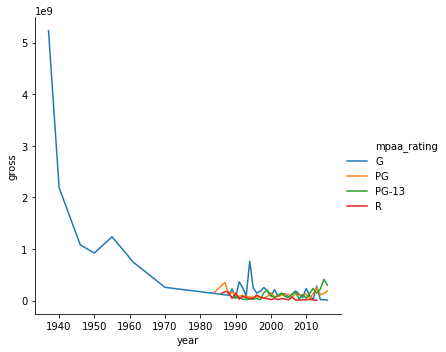

In [7]:
# Plot the ratings by gross over about 80 years
sns.relplot(kind='line', x='year', y='gross', data=rating_yearly, hue='mpaa_rating')

As mentioned before, only movies made after 1985 seem to shed a light on how the movies are being rated and how much gross they make as of late. So it would be a good decision to focus on only movies made after 1985.

Just by inspecting the graph, we see that 'G' rated movies used to be making more money than 'PG' or 'PG-13' rated, although it seems to be the other way around lately.

'R' rated movies doesn't bring in much revenue unsurprisingly, as Disney company is known for its family oriented movies. 

We will apply Linear Regression to see if our takeaways hold any truth. First, we will get rid of movies made before 1985.

In [8]:
#Include only movies made after 1985
gross = gross[gross['year']>=1985]
gross['year'].value_counts()

1995    32
1996    28
1994    28
1993    27
1997    23
1992    22
1998    22
2002    21
1999    21
2006    19
2003    19
2000    19
2004    18
2005    17
2009    16
1991    14
1990    14
2016    14
2001    14
2007    14
2010    14
2011    14
2008    13
2014    12
2015    11
2013    11
2012    10
1989     9
1988     7
1987     4
1986     3
Name: year, dtype: int64

## Applying Linear Regression

In [9]:
#To use 'ratings' in Linear Regression, we need to create binary numbers representing the rating categories. 
rating_dummies = pd.get_dummies(gross['mpaa_rating'], drop_first=True)
rating_dummies.head()


,PG,PG-13,R
45,0,0,1
47,0,0,1
51,0,0,1
52,0,0,1
57,0,0,1


In [10]:
#Run the Linear Regression on the dataset's rating and gross data.  
regr = LinearRegression()
regr.fit(rating_dummies, gross['gross'])
#Get the coefficients corresponding to the ratings
G = regr.intercept_
PG = regr.coef_[0]
PG_13 = regr.coef_[1]
R = regr.coef_[2]

print('G: {}'.format(round(G,2)))
print('PG: {}'.format(round(PG,2)))
print('PG_13: {}'.format(round(PG_13,2)))
print('R: {} '.format(round(R,2)))

G: 135923947.95
PG: -34680988.7
PG_13: -32975363.95
R: -80618142.4 


From result we see that, application of Linear Regression proves our foresight that 'G' rated movies bring in more revenue as there is a positive correlation. 

Also as we suspected from the graph before, there is a strong negative correlation between 'R' rated movies and their gross.

There seems to be a negative correlation between 'PG' and 'PG 13' rated movies and the revenue they make, though we need to take a closer look.

In any case, we can not be entirely sure as of yet as the dataset is fairly small and we ran Regression only once. To make sure, we will use a technique called bootstrapping, where we resample the data and run Linear Regression on it many times to see if there is any fluctuation in the coefficients produced by the Regressions.

If we have some coefficients ending up being zero, then we can conclude that that particular rating does not affect the revenue.

We will resample the data randomly and run Linear Regression on it 500 times. We will save those 500 coefficients of each rating in 4 lists (numpy arrays). Then look into those numbers both statistically and visually to see if there are any zeroes in them. 

The following code creates indices for resampling and 4 empty arrays to save the replicates of coefficients for each rating.

In [11]:
#Create indices for resampling
inds = np.arange(len(gross['mpaa_rating']))
size = 500
#create four empty numpy arrays to save those coefficients produced by the Linear Regression
g_reps = np.empty(shape=size)
pg_reps = np.empty(shape=size)
pg_13_reps = np.empty(shape=size)
r_reps = np.empty(shape=size)



Finally, the following code randomly shuffles the indices, runs the Linear Regression on the 'shuffled' dataset and saves the newly created coefficients for each rating in arrays.

In [12]:
#Randomly shuffle the data 500 times. For each case, run the Linear Regression and get the coefficients correspoding to the ratings.
for i in range(size):
    bs_inds = np.random.choice(inds, size=len(inds))
    rating = gross.iloc[bs_inds,:]['mpaa_rating']
    in_ad_gross = gross.iloc[bs_inds,:]['gross']
    rating_dummies = pd.get_dummies(rating, drop_first=True)
    regr = LinearRegression()
    regr.fit(rating_dummies, in_ad_gross)
    g_reps[i] = regr.intercept_
    pg_reps[i] = regr.coef_[[0]][0]
    pg_13_reps[i] = regr.coef_[[1]][0]
    r_reps[i] = regr.coef_[[2]][0]


We will take a look at those rating coefficients statistically. For each set, we will compute the 95% confidence interval and see if it includes any zero values.

In [13]:
#Compute 95% intervals to see if they include any zeroes.
confidence_interval_g = np.percentile(g_reps, [2.5, 97.5])
confidence_interval_pg = np.percentile(pg_reps, [2.5, 97.5])
confidence_interval_pg_13 = np.percentile(pg_13_reps, [2.5, 97.5])
confidence_interval_r_reps = np.percentile(r_reps, [2.5, 97.5])
print('confidence_interval for G rated movies: {}'.format(confidence_interval_g))
print('confidence_interval for PG rated movies: {}'.format(confidence_interval_pg))
print('confidence_interval for PG-13 rated movies: {}'.format(confidence_interval_pg_13))
print('confidence_interval for R rated movies: {}'.format(confidence_interval_r_reps))

confidence_interval for G rated movies: [1.08711542e+08 1.69848105e+08]
confidence_interval for PG rated movies: [-70682058.53836423  -2798831.84612276]
confidence_interval for PG-13 rated movies: [-71333137.180662     5183160.02211086]
confidence_interval for R rated movies: [-1.1786631e+08 -5.0322721e+07]


We see that 'G' rated movies seem to have a positive correlation and 'R' rated movies have a negative correlation. 'PG-13' may have 0 values as it goes from negative values to positive values. For 'PG' we can not be sure. We have to look at all values. We will do this visually in the next part.  The following code creates 4 graphs for each rating.

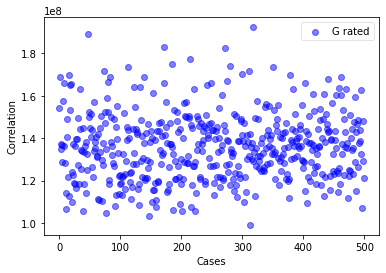

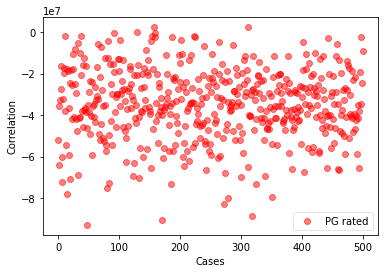

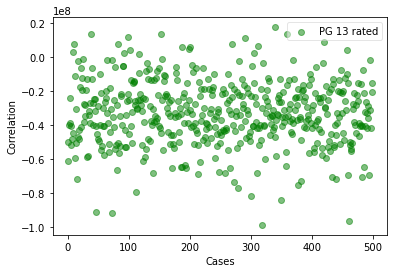

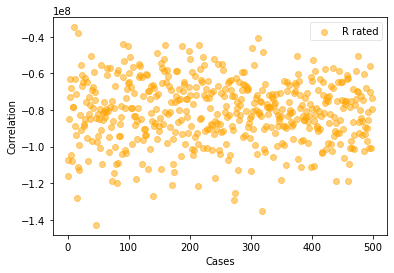

In [14]:
%matplotlib inline
color = ['blue', 'red', 'green', 'orange']
name=['G rated', 'PG rated', 'PG 13 rated', 'R rated']
for i,j in enumerate([g_reps, pg_reps, pg_13_reps, r_reps]):
    plt.scatter(x=np.arange(500), y=j, label=name[i], color=color[i], alpha=0.5)
    plt.xlabel('Cases')
    plt.ylabel('Correlation')
    plt.legend().get_frame().set_alpha(alpha=0.5)
    plt.show()

For 'G' rating, as we suspected, there are no zero values. Since all values are positive, we can infer that a movie being 'G' rated certainly increases its revenue. The reason for this may be, people can go see these movies as a whole family. Naturally they pay more. 

On the contrary, for 'R' rated movies, we see that there is a negative correlation in all cases and there are no zero values which means in no case was there a lack of correlation. The reason for the negative correlation may be people do not bring their children to those movies, so they do not pay as much. Some people may prefer other movie companies if they were inclined to watch an 'R' rated movie.

As for 'PG' and 'PG-13' rated movies, we do see many zero values for many cases. So we conclude that for those cases, there is no correlation between a movie being rated 'PG' or 'PG-13' and the revenue it brings in. For others, it seems like negatively correlated cases overpowers positively correlated cases, but still we can not draw a clear conclusion.

Finally, considering all the evidence, I would advise the Disney company to make more movies targeting the General audience. 

'PG' and 'PG-13' rated movies may occasionally bring in high revenue, but chances are they may not do as well as the 'G' rated ones.

I certainly would not recommend Disney to produce 'R' rated movies based on the data.